In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


import pandas as pd
import numpy as np
import re
import string
import warnings
warnings.filterwarnings("ignore")


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
import contractions
import emoji
from autocorrect import Speller
import textstat


import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv(r"C:\Users\HP\Desktop\git\detection of mental health status using text data\BiLSTM+Word2Vec_model\balanced_dataset_clean_dataset.csv")

# Keep relevant columns and clean
df = df[['statement', 'status']].drop_duplicates(subset='statement')
df = df[df['status'].notnull()].reset_index(drop=True)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93900 entries, 0 to 93899
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  93900 non-null  object
 1   status     93900 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB
None


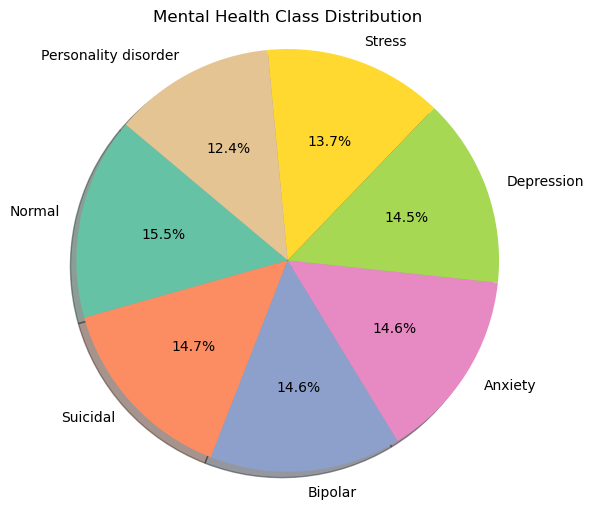

In [4]:

status_counts = df['status'].value_counts()
colors = sns.color_palette("Set2", len(status_counts))

plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title('Mental Health Class Distribution')
plt.axis('equal')
plt.show()


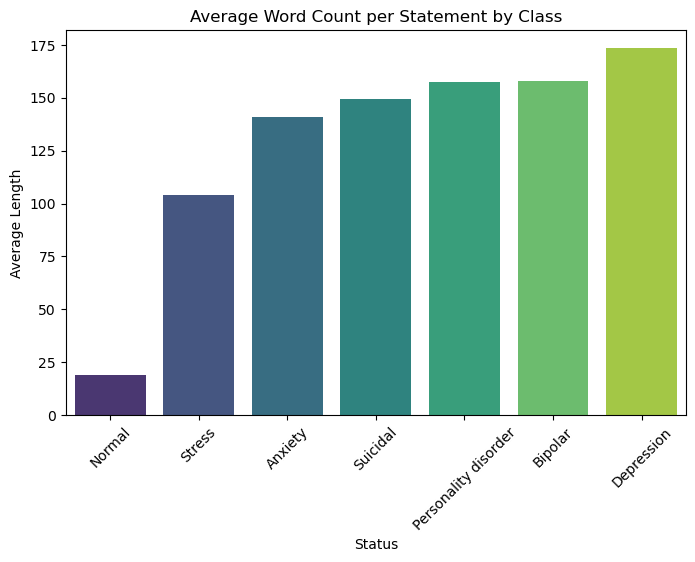

In [5]:
df['text_length'] = df['statement'].apply(lambda x: len(str(x).split()))
avg_lengths = df.groupby('status')['text_length'].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_lengths.index, y=avg_lengths.values, palette='viridis')
plt.title("Average Word Count per Statement by Class")
plt.xlabel("Status")
plt.ylabel("Average Length")
plt.xticks(rotation=45)
plt.show()

In [ ]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = contractions.fix(text)
    text = re.sub(r"http\S+|@\S+|#[A-Za-z0-9_]+|[^a-zA-Z\s]", "", text)
    return text.strip()

df['statement'] = df['statement'].astype(str).apply(clean_text)
df['tokens'] = df['statement'].apply(word_tokenize)
df['tokens'] = df['tokens'].apply(lambda x: [stemmer.stem(w) for w in x if w not in stop_words])

df[['statement', 'tokens', 'status']].head()


In [13]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import contractions
import pandas as pd

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()


def preprocess_text(text):
    text = str(text).lower()                     
    text = contractions.fix(text)                
    text = re.sub(r"http\S+|@\S+|#[A-Za-z0-9_]+|[^a-zA-Z\s]", "", text)  
    tokens = word_tokenize(text)               
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w != 'wa']  
    cleaned_text = ' '.join(tokens)             
    return cleaned_text, tokens


df[['statement', 'tokens']] = df['statement'].apply(lambda x: pd.Series(preprocess_text(x)))


df[['statement', 'tokens', 'status']].head()


df[['statement', 'status']].to_csv('cleaned_dataset.csv', index=False)
print("Dataset saved as 'cleaned_dataset.csv'")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset saved as 'cleaned_dataset.csv'


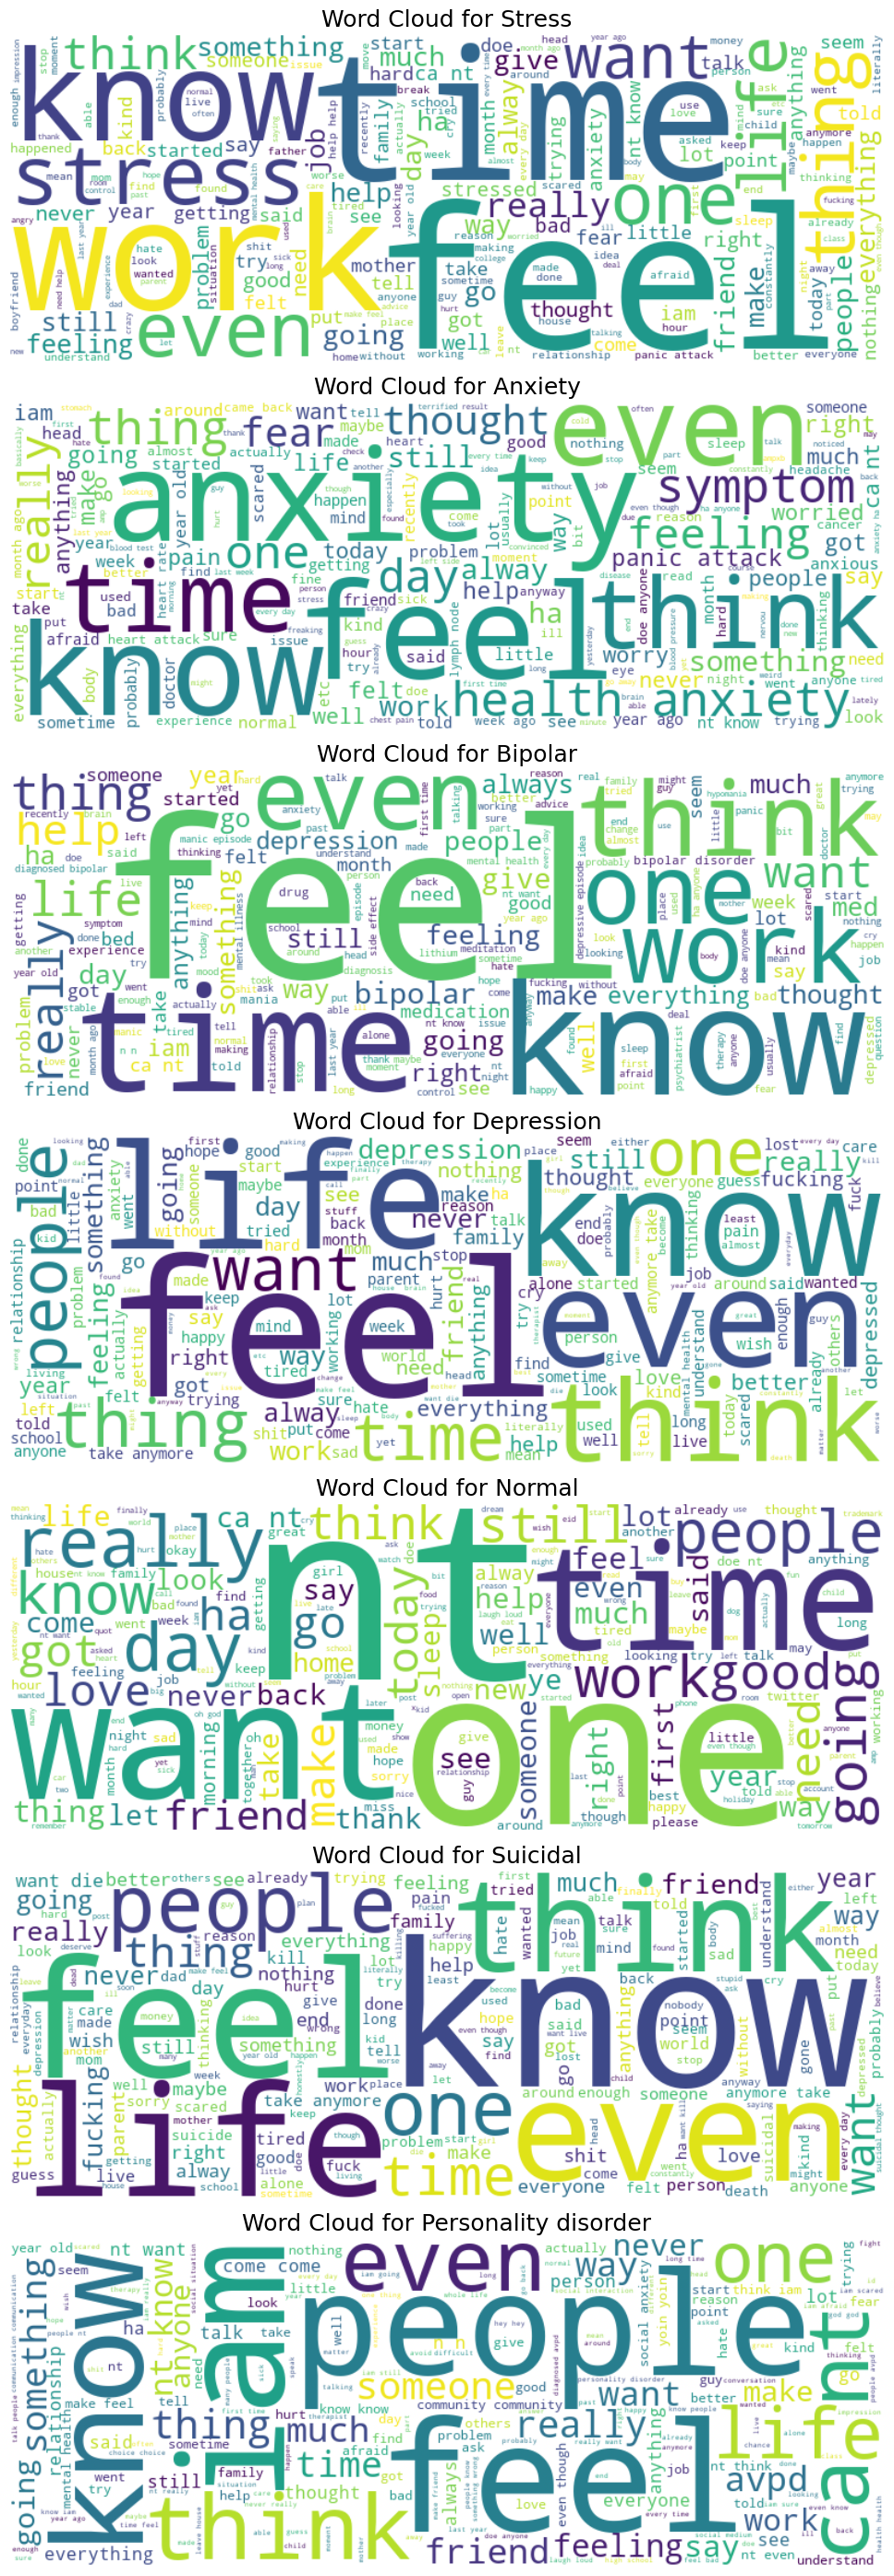

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

classes = df['status'].unique()
plt.figure(figsize=(16, 4 * len(classes)))

for i, cls in enumerate(classes):
    text = ' '.join([' '.join(tokens) for tokens in df[df['status'] == cls]['tokens']])
    wordcloud = WordCloud(width=800, height=300, background_color='white', max_words=200).generate(text)
    
    plt.subplot(len(classes), 1, i + 1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {cls}", fontsize=18)

plt.tight_layout()
plt.show()


In [ ]:
# Text Input → Tokenization → Embedding (Word2Vec) → LSTM Network → Prediction

In [15]:


import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import gensim.downloader as api
import pickle
import logging
import re
import string
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, Dense, Dropout, GaussianNoise, Lambda, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.losses import CategoricalCrossentropy

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Logging suppression for gensim
logging.getLogger('gensim').setLevel(logging.ERROR)
logging.getLogger('urllib3').setLevel(logging.ERROR)


In [16]:
 # Load and Clean Text

In [20]:
import pandas as pd

df.dropna(inplace=True)


X_text = df['statement']   
y_labels = df['status']
df[['statement', 'status']].head(30)




,statement,status
0,could think directly receive flashback school ...,Stress
1,way sleep better sleep night med help,Anxiety
2,always really hyperactive panic let say first ...,Bipolar
3,doe anyone ever feel like think suicide every ...,Depression
4,always told burden waste space fuck even one f...,Stress
5,know woman big boob,Normal
6,suffering depression anxiety year ha made even...,Depression
7,forget lot lately one second know one forget e...,Depression
8,feeling dread despair overwhelming feeling dre...,Bipolar
9,miss everything person close neglected way peo...,Depression


In [19]:
# Encode Labels and Tokenize

In [21]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import (
    Input, Embedding, LSTM, Bidirectional, Dense, Dropout,
    LayerNormalization, GaussianNoise, SpatialDropout1D, Add, Layer
)
from tensorflow.keras.models import Model
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import AdamW
from tqdm import tqdm
import gensim.downloader as api

# -------------------------------
# 1. Label Encoding
# -------------------------------
label_enc = LabelEncoder()
y_int = label_enc.fit_transform(y_labels)  
y_cat = to_categorical(y_int)

# -------------------------------
# 2. Tokenization & Padding
# -------------------------------
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_text)  
X_seq = tokenizer.texts_to_sequences(X_text)
X_pad = pad_sequences(X_seq, maxlen=max_len, padding='post')

# -------------------------------
# 3. Load Word2Vec Google News 300D
# -------------------------------
print("Loading Word2Vec model...")
word2vec = api.load("word2vec-google-news-300")
print("Model loaded!")

embedding_dim = 300  
word_index = tokenizer.word_index
num_words = min(max_words, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in tqdm(word_index.items(), desc="Creating embedding matrix"):
    if i >= num_words:
        continue
    try:
        embedding_matrix[i] = word2vec[word]
    except KeyError:
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))

# -------------------------------
# 4. Augmentation Layer 
# -------------------------------
class AugmentNoiseAndScale(tf.keras.layers.Layer):
    def call(self, x, training=None):
        if training:
            noise = tf.random.normal(tf.shape(x), mean=0.0, stddev=0.01)
            scale = tf.random.uniform([tf.shape(x)[0], 1, 1], minval=0.9, maxval=1.1)
            return (x + noise) * scale
        return x

# -------------------------------
# 5. Attention Layer
# -------------------------------
class AttentionLayer(Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(
            name="att_weight",
            shape=(input_shape[-1], 1),
            initializer='random_normal',
            trainable=True
        )
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        score = tf.matmul(inputs, self.W)
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = tf.reduce_sum(inputs * attention_weights, axis=1)
        return context_vector

# -------------------------------
# 6. Model Architecture
# -------------------------------
lstm_units = 64  
num_classes = y_cat.shape[1]

input_layer = Input(shape=(max_len,), name='input')

# Word2Vec Embedding Layer
x = Embedding(
    input_dim=num_words,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=max_len,
    trainable=True  
)(input_layer)

x = SpatialDropout1D(0.3)(x)
x = GaussianNoise(0.1)(x)
x = AugmentNoiseAndScale()(x)

# First BiLSTM
lstm1 = Bidirectional(LSTM(lstm_units, return_sequences=True))(x)
lstm1 = Dropout(0.4)(lstm1)

# Second BiLSTM with Residual Connection
lstm2 = Bidirectional(LSTM(lstm_units, return_sequences=True))(lstm1)
lstm2 = Add()([lstm1, lstm2])  # Residual connection

# Dual Attention
att1 = AttentionLayer()(lstm2)  # Word-level
att2 = AttentionLayer()(lstm1)  # Sentence-level
merged_att = Add()([att1, att2])

# Dense layers
x = LayerNormalization()(merged_att)
x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-5))(x)
x = Dropout(0.4)(x)

output = Dense(num_classes, activation='softmax', name='output')(x)

model = Model(inputs=input_layer, outputs=output)
model.summary()

# -------------------------------
# 7. Compile Model
# -------------------------------
loss_fn = CategoricalCrossentropy(label_smoothing=0.05)
optimizer = AdamW(learning_rate=3e-4, weight_decay=1e-4, clipnorm=1.0)

model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# -------------------------------
# 8. Callbacks
# -------------------------------
callbacks = [
    ModelCheckpoint("best_rnn_model_improved.h5", monitor='val_loss', save_best_only=True, verbose=1),
    EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6, verbose=1)
]

# -------------------------------
# 9. Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_pad, y_cat, test_size=0.2, random_state=42, stratify=y_cat
)

# -------------------------------
# 10. Train Model
# -------------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    callbacks=callbacks,
    verbose=1
)


Loading Word2Vec model...
Model loaded!


Creating embedding matrix: 100%|█████████████████████████████████████████████| 73589/73589 [00:00<00:00, 448356.13it/s]


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)            │ (None, 100)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Embedding)         │ (None, 100, 300)          │       3,000,000 │ input[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ spatial_dropout1d             │ (None, 100, 300)          │               0 │ embedding[0][0]            │
│ (SpatialDropout1D)            │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gaussian_noise                │ (None, 100, 300)          │               0 │ spatial_dropout1d[0][0]    │
│ (GaussianNoise)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ augment_noise_and_scale       │ (None, 100, 300)          │               0 │ gaussian_noise[0][0]       │
│ (AugmentNoiseAndScale)        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional (Bidirectional) │ (None, 100, 128)          │         186,880 │ augment_noise_and_scale[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 100, 128)          │               0 │ bidirectional[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_1               │ (None, 100, 128)          │          98,816 │ dropout[0][0]              │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 100, 128)          │               0 │ dropout[0][0],             │
│                               │                           │                 │ bidirectional_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention_layer               │ (None, 128)               │             128 │ add[0][0]                  │
│ (AttentionLayer)              │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention_layer_1             │ (None, 128)               │             128 │ dropout[0][0]              │
│ (AttentionLayer)              │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_1 (Add)                   │ (None, 128)               │               0 │ attention_layer[0][0],     │
│                               │                           │                 │ attention_layer_1[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization           │ (None, 128)               │             256 │ add_1[0][0]                │
│ (LayerNormalization)          │                           │               

 Total params: 3,303,623 (12.60 MB)

 Trainable params: 3,303,623 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.4798 - loss: 1.4599
Epoch 1: val_loss improved from inf to 0.86276, saving model to best_rnn_model_improved.h5


1174/1174 ━━━━━━━━━━━━━━━━━━━━ 470s 385ms/step - accuracy: 0.4799 - loss: 1.4597 - val_accuracy: 0.7473 - val_loss: 0.8628 - learning_rate: 3.0000e-04
Epoch 2/10
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.7296 - loss: 0.9226
Epoch 2: val_loss improved from 0.86276 to 0.76145, saving model to best_rnn_model_improved.h5


1174/1174 ━━━━━━━━━━━━━━━━━━━━ 417s 355ms/step - accuracy: 0.7296 - loss: 0.9226 - val_accuracy: 0.7860 - val_loss: 0.7614 - learning_rate: 3.0000e-04
Epoch 3/10
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.7766 - loss: 0.8031
Epoch 3: val_loss improved from 0.76145 to 0.72369, saving model to best_rnn_model_improved.h5


1174/1174 ━━━━━━━━━━━━━━━━━━━━ 460s 370ms/step - accuracy: 0.7767 - loss: 0.8031 - val_accuracy: 0.8063 - val_loss: 0.7237 - learning_rate: 3.0000e-04
Epoch 4/10
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.8083 - loss: 0.7293
Epoch 4: val_loss improved from 0.72369 to 0.68192, saving model to best_rnn_model_improved.h5


1174/1174 ━━━━━━━━━━━━━━━━━━━━ 456s 389ms/step - accuracy: 0.8083 - loss: 0.7293 - val_accuracy: 0.8223 - val_loss: 0.6819 - learning_rate: 3.0000e-04
Epoch 5/10
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.8266 - loss: 0.6826
Epoch 5: val_loss improved from 0.68192 to 0.66466, saving model to best_rnn_model_improved.h5


1174/1174 ━━━━━━━━━━━━━━━━━━━━ 531s 453ms/step - accuracy: 0.8266 - loss: 0.6826 - val_accuracy: 0.8337 - val_loss: 0.6647 - learning_rate: 3.0000e-04
Epoch 6/10
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - accuracy: 0.8427 - loss: 0.6415
Epoch 6: val_loss improved from 0.66466 to 0.64991, saving model to best_rnn_model_improved.h5


1174/1174 ━━━━━━━━━━━━━━━━━━━━ 605s 490ms/step - accuracy: 0.8427 - loss: 0.6415 - val_accuracy: 0.8383 - val_loss: 0.6499 - learning_rate: 3.0000e-04
Epoch 7/10
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.8576 - loss: 0.6093
Epoch 7: val_loss improved from 0.64991 to 0.63600, saving model to best_rnn_model_improved.h5


1174/1174 ━━━━━━━━━━━━━━━━━━━━ 536s 457ms/step - accuracy: 0.8576 - loss: 0.6093 - val_accuracy: 0.8445 - val_loss: 0.6360 - learning_rate: 3.0000e-04
Epoch 8/10
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step - accuracy: 0.8695 - loss: 0.5792
Epoch 8: val_loss improved from 0.63600 to 0.63393, saving model to best_rnn_model_improved.h5


1174/1174 ━━━━━━━━━━━━━━━━━━━━ 547s 466ms/step - accuracy: 0.8695 - loss: 0.5792 - val_accuracy: 0.8495 - val_loss: 0.6339 - learning_rate: 3.0000e-04
Epoch 9/10
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.8808 - loss: 0.5529
Epoch 9: val_loss improved from 0.63393 to 0.61738, saving model to best_rnn_model_improved.h5


1174/1174 ━━━━━━━━━━━━━━━━━━━━ 553s 471ms/step - accuracy: 0.8808 - loss: 0.5529 - val_accuracy: 0.8535 - val_loss: 0.6174 - learning_rate: 3.0000e-04
Epoch 10/10
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.8909 - loss: 0.5324
Epoch 10: val_loss improved from 0.61738 to 0.61401, saving model to best_rnn_model_improved.h5


1174/1174 ━━━━━━━━━━━━━━━━━━━━ 564s 473ms/step - accuracy: 0.8909 - loss: 0.5324 - val_accuracy: 0.8564 - val_loss: 0.6140 - learning_rate: 3.0000e-04


587/587 ━━━━━━━━━━━━━━━━━━━━ 47s 80ms/step


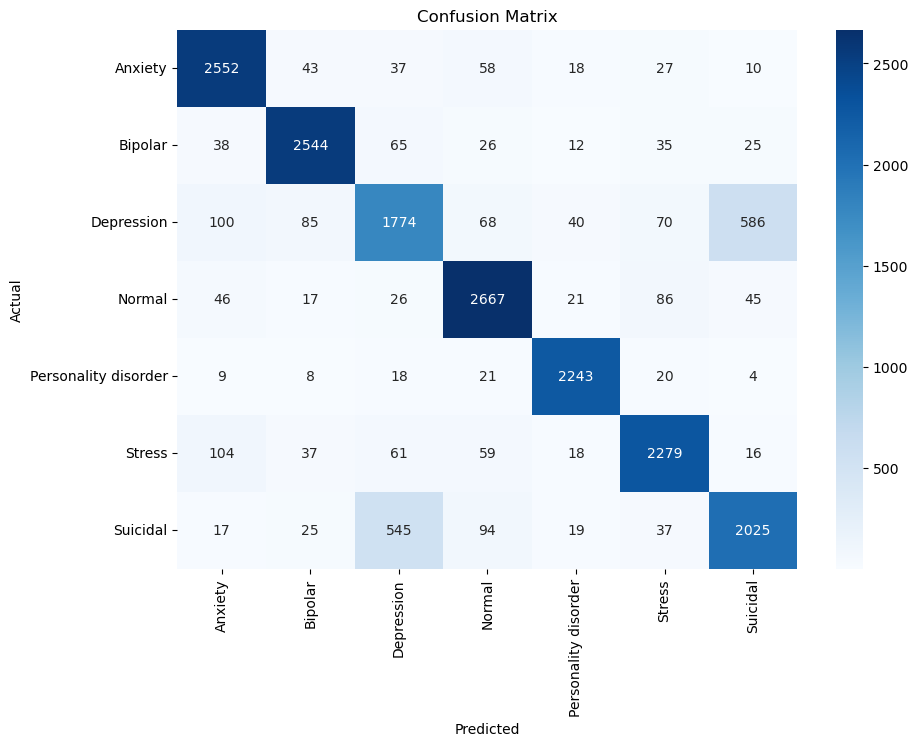


Classification Report:

                      precision    recall  f1-score   support

             Anxiety       0.89      0.93      0.91      2745
             Bipolar       0.92      0.93      0.92      2745
          Depression       0.70      0.65      0.68      2723
              Normal       0.89      0.92      0.90      2908
Personality disorder       0.95      0.97      0.96      2323
              Stress       0.89      0.89      0.89      2574
            Suicidal       0.75      0.73      0.74      2762

            accuracy                           0.86     18780
           macro avg       0.86      0.86      0.86     18780
        weighted avg       0.85      0.86      0.85     18780



In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict class probabilities
y_pred_probs = model.predict(X_test)  
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)  

# Confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_enc.classes_,
            yticklabels=label_enc.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_enc.classes_))

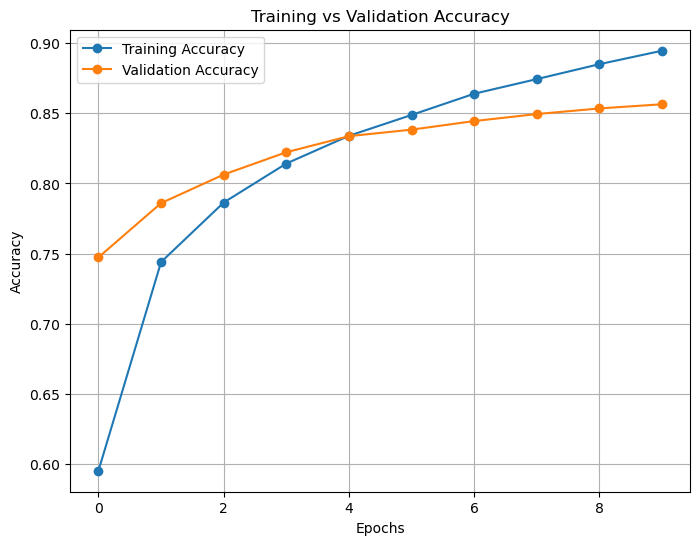

In [50]:
import matplotlib.pyplot as plt

# Assuming you have the training history stored in 'history'
# For example: history = model.fit(...)

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')

plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 286ms/step


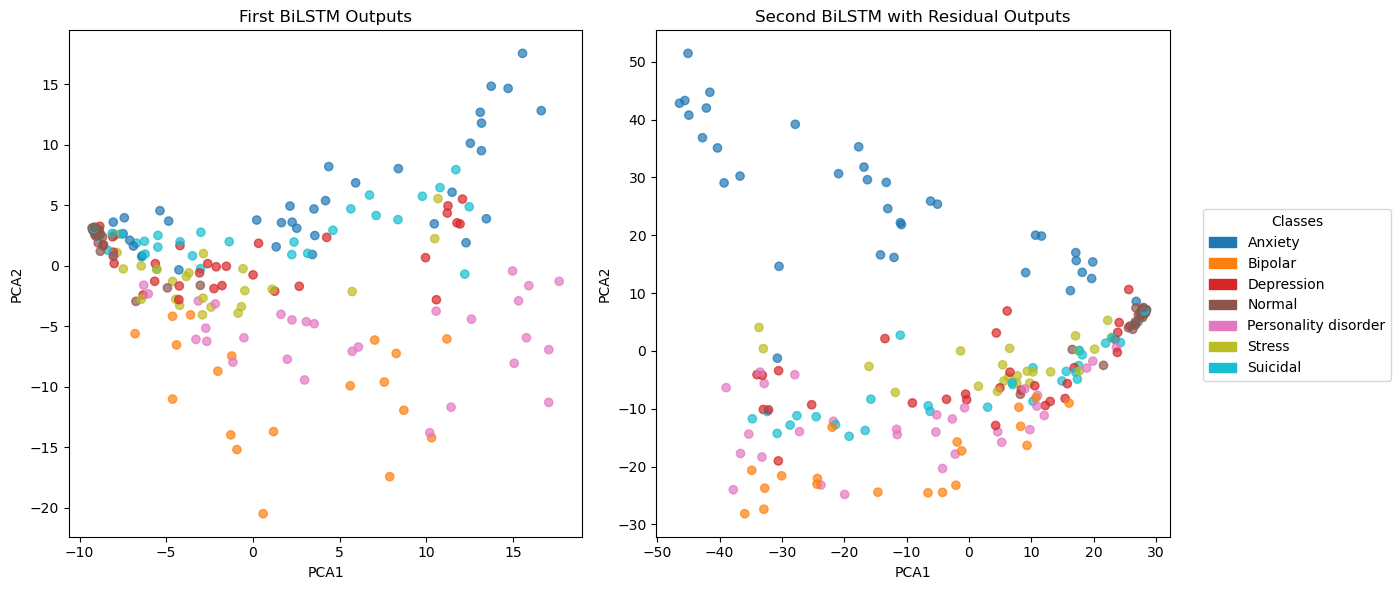

In [54]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches

# -------------------------------
# Intermediate models
# -------------------------------
model_lstm1 = tf.keras.Model(inputs=model.input, outputs=lstm1)
model_lstm2 = tf.keras.Model(inputs=model.input, outputs=lstm2)

# Use a small batch for visualization
X_vis = X_train[:200]
y_vis = np.argmax(y_train[:200], axis=1)

# -------------------------------
# Get outputs
# -------------------------------
lstm1_out = model_lstm1.predict(X_vis)
lstm2_out = model_lstm2.predict(X_vis)

# -------------------------------
# Flatten LSTM outputs for PCA
# -------------------------------
lstm1_flat = lstm1_out.reshape(lstm1_out.shape[0], -1)
lstm2_flat = lstm2_out.reshape(lstm2_out.shape[0], -1)

# -------------------------------
# Apply PCA to reduce to 2D
# -------------------------------
pca = PCA(n_components=2)
lstm1_2d = pca.fit_transform(lstm1_flat)
lstm2_2d = pca.fit_transform(lstm2_flat)

# -------------------------------
# Side-by-side plots
# -------------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First BiLSTM
scatter1 = axes[0].scatter(lstm1_2d[:,0], lstm1_2d[:,1], c=y_vis, cmap='tab10', alpha=0.7)
axes[0].set_title("First BiLSTM Outputs")
axes[0].set_xlabel("PCA1")
axes[0].set_ylabel("PCA2")

# Second BiLSTM with Residual
scatter2 = axes[1].scatter(lstm2_2d[:,0], lstm2_2d[:,1], c=y_vis, cmap='tab10', alpha=0.7)
axes[1].set_title("Second BiLSTM with Residual Outputs")
axes[1].set_xlabel("PCA1")
axes[1].set_ylabel("PCA2")

# -------------------------------
# Legend with class names + colors
# -------------------------------
class_names = label_enc.classes_  # same order as training labels
cmap = plt.cm.get_cmap("tab10", len(class_names))

patches = [mpatches.Patch(color=cmap(i), label=class_names[i]) 
           for i in range(len(class_names))]

fig.legend(handles=patches, loc="center right", title="Classes")

plt.tight_layout(rect=[0, 0, 0.85, 1])  
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 307ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 284ms/step


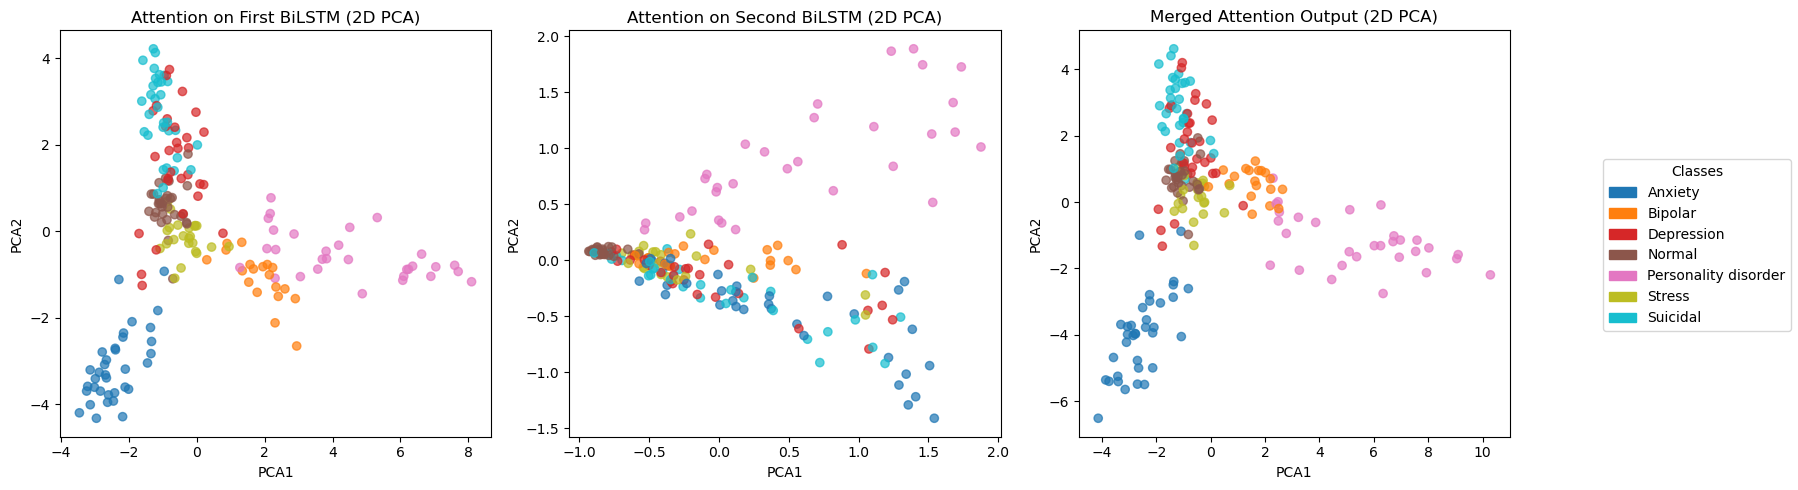

In [55]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches

# -------------------------------
# Intermediate models for attention
# -------------------------------
model_att1 = tf.keras.Model(inputs=model.input, outputs=att1)
model_att2 = tf.keras.Model(inputs=model.input, outputs=att2)
model_merged_att = tf.keras.Model(inputs=model.input, outputs=merged_att)

# Use a small batch for visualization
X_vis = X_train[:200]
y_vis = np.argmax(y_train[:200], axis=1)

# -------------------------------
# Get outputs
# -------------------------------
att1_out = model_att1.predict(X_vis)
att2_out = model_att2.predict(X_vis)
merged_att_out = model_merged_att.predict(X_vis)

# -------------------------------
# Apply PCA
# -------------------------------
pca = PCA(n_components=2)
att1_2d = pca.fit_transform(att1_out)
att2_2d = pca.fit_transform(att2_out)
merged_att_2d = pca.fit_transform(merged_att_out)

# -------------------------------
# Class legend setup
# -------------------------------
class_names = label_enc.classes_
cmap = plt.cm.get_cmap("tab10", len(class_names))
patches = [mpatches.Patch(color=cmap(i), label=class_names[i]) 
           for i in range(len(class_names))]

# -------------------------------
# Plot side by side
# -------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# First BiLSTM Attention
axes[0].scatter(att1_2d[:, 0], att1_2d[:, 1], c=y_vis, cmap='tab10', alpha=0.7)
axes[0].set_title("Attention on First BiLSTM (2D PCA)")
axes[0].set_xlabel("PCA1")
axes[0].set_ylabel("PCA2")

# Second BiLSTM Attention
axes[1].scatter(att2_2d[:, 0], att2_2d[:, 1], c=y_vis, cmap='tab10', alpha=0.7)
axes[1].set_title("Attention on Second BiLSTM (2D PCA)")
axes[1].set_xlabel("PCA1")
axes[1].set_ylabel("PCA2")

# Merged Attention
axes[2].scatter(merged_att_2d[:, 0], merged_att_2d[:, 1], c=y_vis, cmap='tab10', alpha=0.7)
axes[2].set_title("Merged Attention Output (2D PCA)")
axes[2].set_xlabel("PCA1")
axes[2].set_ylabel("PCA2")

# Add a legend for all plots
fig.legend(handles=patches, loc="center right", title="Classes")

plt.tight_layout(rect=[0, 0, 0.85, 1])  # leave space for legend
plt.show()
